In [2]:
import pandas as pd
import numpy as np
df_mtmv = pd.read_csv("mtmv_data_10_12.csv", index_col = 0)

## drop those columns which do not have vote_shape, mshare, or rep_inc
df_mtmv = df_mtmv.dropna(subset = ['vote_share', 'mshare', 'rep_inc'])

In [3]:
## vote share and mention share mean
## by rpublican incumbency
gr_mtmv = df_mtmv.groupby('rep_inc')
gr_mtmv[['vote_share', 'mshare']].mean()

,vote_share,mshare
rep_inc,,
0,42.119264,39.360672
1,67.516408,71.962441


In [4]:
## vote share and mention share standard deviation
## vy republican incumbency
gr_mtmv[['vote_share', 'mshare']].std()

,vote_share,mshare
rep_inc,,
0,13.850496,27.930878
1,7.005758,28.918504


In [5]:
from scipy.stats.stats import pearsonr
print(pearsonr(df_mtmv['mshare'], df_mtmv['vote_share'])[0])

0.508867322507


In [6]:
from statsmodels.formula.api import ols

model = ols("vote_share ~ rep_inc + mshare + pct_white + \
            pct_college + med_hhinc + pct_female", df_mtmv).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             vote_share   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     221.8
Date:                Fri, 20 Oct 2017   Prob (F-statistic):          9.58e-124
Time:                        09:40:28   Log-Likelihood:                -1427.0
No. Observations:                 406   AIC:                             2868.
Df Residuals:                     399   BIC:                             2896.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       8.2099     24.490      0.335      0.738     -39.936      56.356
rep_inc        18.3989      1.008     18.257      0.000      16.418      20.380
mshare          0.0543      0.015      3.639      0.000       0.025       0.084
pct_white       0.4735      0.026     18.028      0.000       0.422       0.525
pct_college    -0.3384      0.073     -4.619      0.000      -0.482      -0.194
med_hhinc       0.1132      0.051      2.211      0.028       0.013       0.214
pct_female      0.0418      0.464      0.090      0.928      -0.870       0.953
==============================================================================
Omnibus:                       14.579   Durbin-Watson:                   1.400
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.713
Skew:                           0.410   Prob(JB):                     0.000387
Kurtosis:                       3.507   Cond. No.                     7.27e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.27e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
df_iris = pd.read_csv("iris.csv", index_col = 0)
df_iris

,sepal width (cm),petal length (cm),petal width (cm),species
sepal length (cm),,,,
5.1,3.5,1.4,0.2,setosa
4.9,3.0,1.4,0.2,setosa
4.7,3.2,1.3,0.2,setosa
4.6,3.1,1.5,0.2,setosa
5.0,3.6,1.4,0.2,setosa
5.4,3.9,1.7,0.4,setosa
4.6,3.4,1.4,0.3,setosa
5.0,3.4,1.5,0.2,setosa
4.4,2.9,1.4,0.2,setosa


In [8]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use ('ggplot')

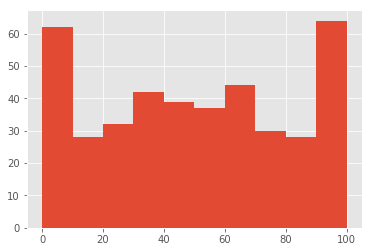

In [10]:
df_mtmv['mshare'].hist()

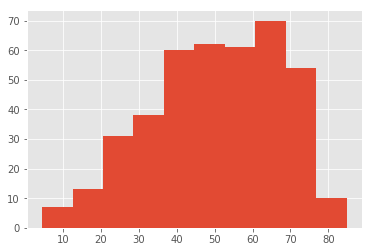

In [11]:
df_mtmv['vote_share'].hist()

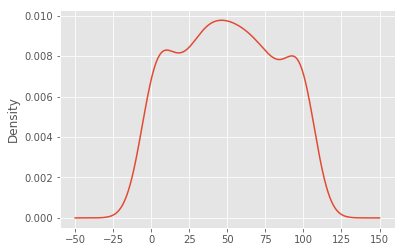

In [21]:
df_mtmv['mshare'].plot.kde()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11865e588>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x118842198>]], dtype=object)

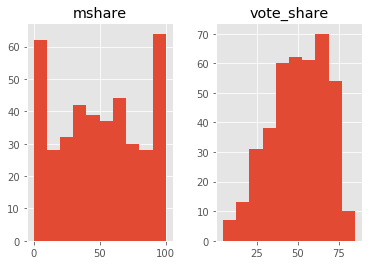

In [25]:
df_mtmv[['mshare', 'vote_share']].hist()

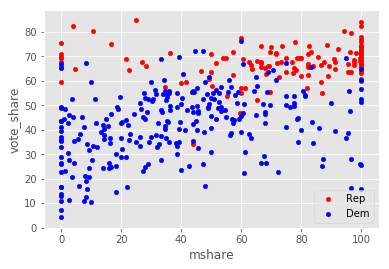

In [34]:
ax = df_mtmv[df_mtmv['rep_inc'] == 1].plot.scatter(x = 'mshare', y = 'vote_share', color = 'Red', label = 'Rep')
df_mtmv[df_mtmv['rep_inc'] == 0].plot.scatter(x = 'mshare', y = 'vote_share', color = 'Blue', label = 'Dem', ax = ax)
